In [1]:
from style_transfer import *
from IPython.display import Audio
from dataset import ItemClass
import torch
from model import *

/opt/conda/envs/proj/envs/waveglow/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
d = torch.load('asr/trained_models/wavglow-styletransfer/epoch=0-step=2371.ckpt')

asr = LightningCTCLASMTL(**{
    'n_mels': 80, 
    'n_fft': 1024,
    'fmin': 0,
    'fmax': 8000,
    'sr': 22050,
    'win_length': 1024,
    'hop_length': 256,
    'wav_max_length': 3024,
    'transcript_max_length': 580,
    'learning_rate': 1e-5, #1e-3, 
    'batch_size': 12,
    'weight_decay': 0, 
    'encoder_num_layers': 2,
    'encoder_hidden_dim': 256//2,
    'encoder_bidirectional': True,
    'encoder_dropout': 0.2,
    'decoder_hidden_dim': 512//2,  # must be 2 x encoder_hidden_dim
    'decoder_num_layers': 2,
    'decoder_multi_head': 1,
    'decoder_mlp_dim': 64,
    'asr_label_smooth': 0.1,
    'teacher_force_prob': 0.9,
    'ctc_weight': 0.5,
    'asr_weight': 0.7,
    'speaker_id_weight': 0.3
})
asr.load_state_dict(d['state_dict'])

Reusing dataset librispeech_asr (/home/ani.vegesana.backup/.cache/huggingface/datasets/librispeech_asr/clean/2.1.0/1f4602f6b5fed8d3ab3e3382783173f2e12d9877e98775e34d7780881175096c)
Loading cached processed dataset at /home/ani.vegesana.backup/.cache/huggingface/datasets/librispeech_asr/clean/2.1.0/1f4602f6b5fed8d3ab3e3382783173f2e12d9877e98775e34d7780881175096c/cache-a795eaaac6783cf6.arrow
Loading cached processed dataset at /home/ani.vegesana.backup/.cache/huggingface/datasets/librispeech_asr/clean/2.1.0/1f4602f6b5fed8d3ab3e3382783173f2e12d9877e98775e34d7780881175096c/cache-edf4ca3d2f9596a0.arrow
Reusing dataset librispeech_asr (/home/ani.vegesana.backup/.cache/huggingface/datasets/librispeech_asr/clean/2.1.0/1f4602f6b5fed8d3ab3e3382783173f2e12d9877e98775e34d7780881175096c)
Loading cached processed dataset at /home/ani.vegesana.backup/.cache/huggingface/datasets/librispeech_asr/clean/2.1.0/1f4602f6b5fed8d3ab3e3382783173f2e12d9877e98775e34d7780881175096c/cache-230f3f90064d403f.arrow
Lo

<All keys matched successfully>

In [3]:
audio = asr.train_dataset.hf_ds[0]['audio']
Audio(data=audio['array'], rate=audio['sampling_rate'])

In [4]:
def dummy_batch(x):
    return ItemClass(
        x.input_feature.unsqueeze(0),
        torch.Tensor([x.input_length]),
        x.input_path,
        x.human_transcript_label.unsqueeze(0),
        torch.Tensor([x.human_transcript_length]),
        torch.Tensor([x.speaker_idx])
    )

In [5]:
st = StyleTransfer(asr, dummy_batch(asr.train_dataset[0]), dummy_batch(asr.train_dataset[1]))

/opt/conda/envs/proj/envs/waveglow/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
wandb: Currently logged in as: anivegesana (use `wandb login --relogin` to force relogin)


/opt/conda/envs/proj/envs/waveglow/lib/python3.9/site-packages/pytorch_lightning/loggers/wandb.py:347: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(


In [6]:
results = st.analyze()

/home/ani.vegesana.backup/cs224s-project/asr/model/mtl.py:146: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  input_lengths // (2 ** self.num_pyramid_layers),


{'content_path': '374-180298-0000.flac',
 'content_mels': tensor([[-1.0000, -0.6592, -0.7083,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -0.7378, -0.7870,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -0.7796, -0.8287,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-1.0000, -0.8531, -0.9023,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -0.8566, -0.9058,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -0.8749, -0.9241,  ..., -1.0000, -1.0000, -1.0000]]),
 'style_path': '374-180298-0001.flac',
 'style_mels': tensor([[-1.0000, -0.9210, -0.9692,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -0.9864, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -0.9976, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-1.0000, -0.8113, -0.8595,  ..., -0.7833, -0.8175, -0.9591],
         [-1.0000, -0.9405, -0.9887,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]),
 'styl

In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_log_spectrogram(mel):
  fig, ax = plt.subplots(1,1,figsize=(20,5))
#   sr, wavdata = wavfile.read(test_manifest[key]['wav'])
  sr = 22050
#   wavdata = 
#   mel = librosa.feature.melspectrogram(wavdata, sr, n_fft=2048, fmin=0, fmax=sr/2, n_mels=256)
#   mel_db = librosa.power_to_db(mel, ref=np.max)
  img = librosa.display.specshow(mel, y_axis='mel', x_axis='time', fmax=sr/2, ax=ax)
  ax.set(title='Mel spectrogram display')
  fig.colorbar(img, ax=ax, format="%+2.f dB")

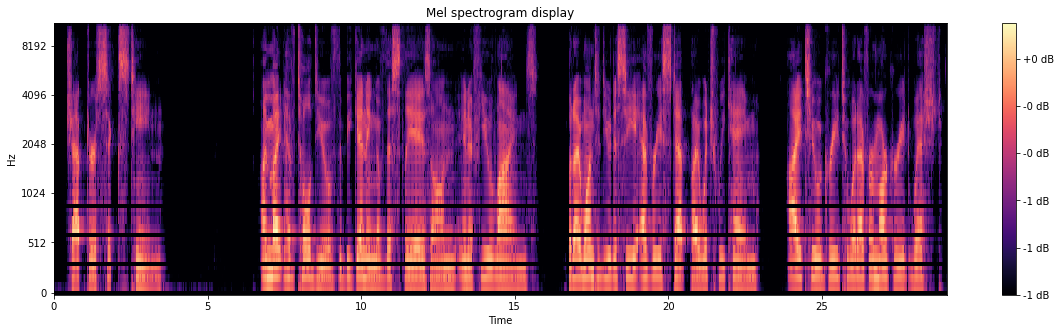

In [17]:
plot_log_spectrogram(results['content_mels'].detach().cpu().T.numpy())

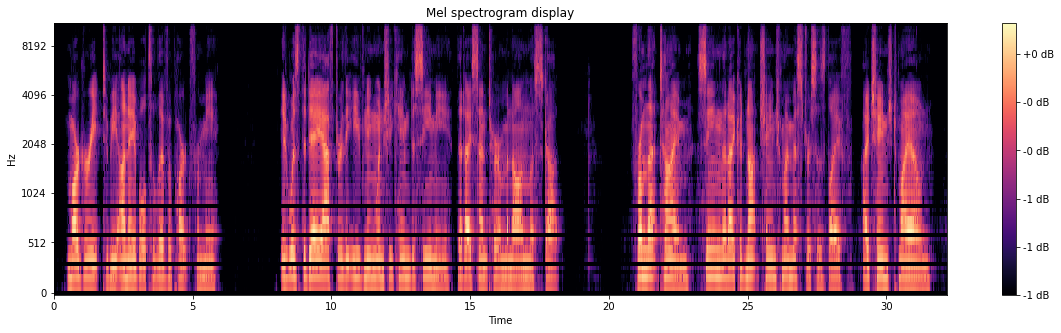

In [18]:
plot_log_spectrogram(results['style_mels'].detach().cpu().T.numpy())

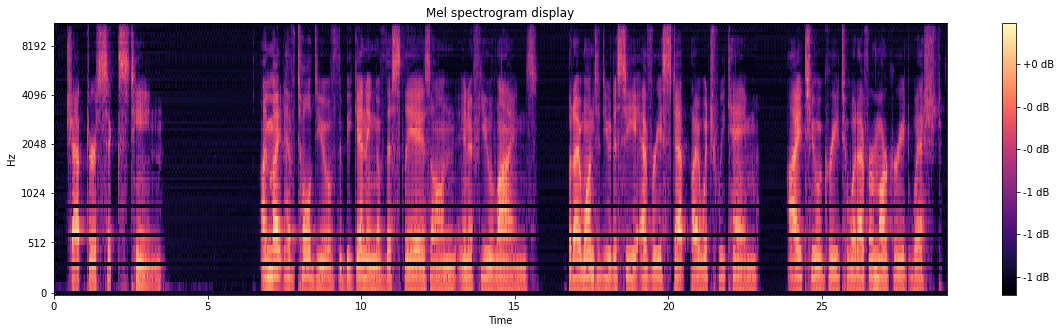

In [16]:
plot_log_spectrogram(results['posttransfer_mels'].detach().cpu().T.numpy())

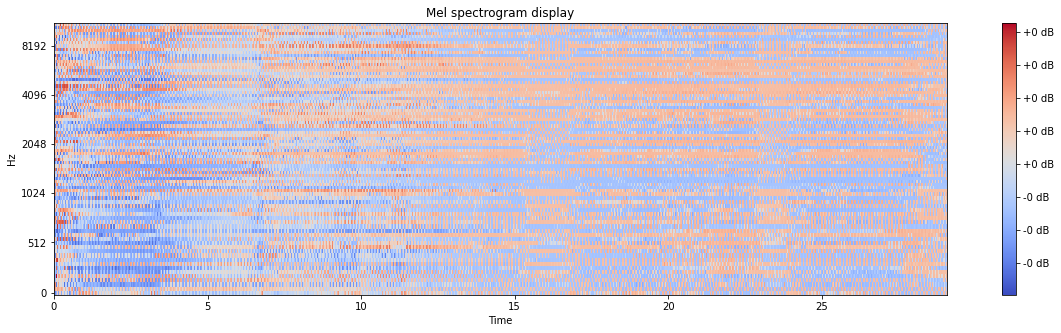

In [20]:
plot_log_spectrogram((results['content_mels'] - results['posttransfer_mels']).detach().cpu().T.numpy())